In [57]:
# imports, etc
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd


In [58]:
# this will read in the input file!
inputfile="./crude-oil-with-features.csv"
df=pd.read_csv(inputfile,header=0, sep=',') 
df.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,Feb 18,61.64,64.76,66.30,58.07,11.99M,-4.77
1,Jan 18,64.73,60.20,66.66,60.10,12.77M,7.13


In [59]:
lr = linear_model.LinearRegression()

In [60]:
# delete columns that have non-numbers in them
del df['Date']
del df['Vol.']

In [61]:
# deleting "change %" since it seems like too much info
# for fun predictions....
del df['Change %']
df.head(2) # no more "Change %"!


,Price,Open,High,Low
0,61.64,64.76,66.30,58.07
1,64.73,60.20,66.66,60.10


In [62]:
# let's predict the "Low" and make it our y
y = df['Low']

del df['Low']
data_without_low = df

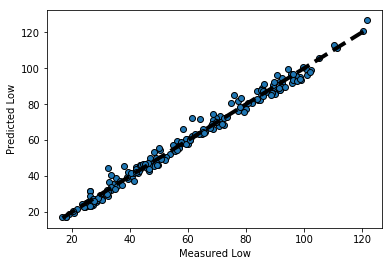

In [64]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, data_without_low, y, cv=10)

# hey we did pretty good!
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured Low')
ax.set_ylabel('Predicted Low')
plt.show()
